In [35]:
import numpy as np
import cv2
import pytesseract
import matplotlib.pyplot as plt

https://tesseract-ocr.github.io/tessdoc/Command-Line-Usage

https://rrc.cvc.uab.es/?ch=13&com=evaluation&task=2

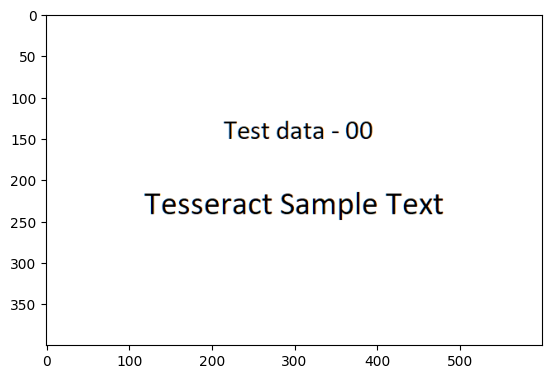

In [36]:
test_txt = "simple_text.png"
test_img = cv2.imread(test_txt)
res_img = test_img.copy()
detail_img = test_img.copy()
plt.imshow(test_img)

In [37]:
test_res = pytesseract.image_to_data(test_img, output_type=pytesseract.Output.DICT)
print(type(test_res))
print(test_res)
for i in test_res:
    print("%10s" % i, end='    ')
    print(test_res[i])

<class 'dict'>
{'level': [1, 2, 3, 4, 5, 5, 5, 5, 2, 3, 4, 5, 5, 5], 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'block_num': [0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2], 'par_num': [0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], 'line_num': [0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1], 'word_num': [0, 0, 0, 0, 1, 2, 3, 4, 0, 0, 0, 1, 2, 3], 'left': [0, 215, 215, 215, 215, 279, 346, 363, 119, 119, 119, 119, 284, 411], 'top': [0, 129, 129, 129, 130, 129, 142, 130, 215, 215, 215, 217, 215, 217], 'width': [600, 180, 180, 180, 55, 57, 8, 32, 361, 361, 361, 154, 116, 69], 'height': [400, 22, 22, 22, 21, 22, 2, 21, 34, 34, 34, 25, 34, 25], 'conf': [-1, -1, -1, -1, 96, 90, 90, 94, -1, -1, -1, 96, 96, 96], 'text': ['', '', '', '', 'Test', 'data', '-', '00', '', '', '', 'Tesseract', 'Sample', 'Text']}
     level    [1, 2, 3, 4, 5, 5, 5, 5, 2, 3, 4, 5, 5, 5]
  page_num    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
 block_num    [0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2]
   par_num    [0, 0,

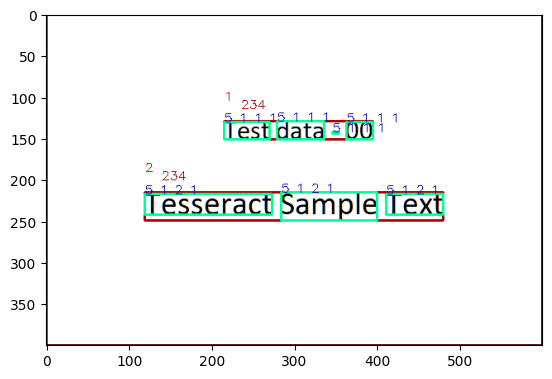

In [38]:
for i in range(len(test_res['text'])):
    x = test_res['left'][i]
    y = test_res['top'][i]
    w = test_res['width'][i]
    h = test_res['height'][i]

    text = str(test_res['level'][i]) + ' ' + str(test_res['page_num'][i]) + ' ' + str(test_res['block_num'][i]) + ' ' + str(test_res['par_num'][i])
    conf = int(test_res['conf'][i])

    if conf==-1:
        cv2.rectangle(detail_img, (x,y), (x+w,y+h), (50+int(test_res['level'][i])*30,0,0), 2)
        cv2.putText(detail_img, str(test_res['level'][i]), (x+int(test_res['level'][i])*10,y-15), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (150,0,0), 1)
        cv2.putText(detail_img, str(test_res['block_num'][i]), (x,y-25), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (200,0,0), 1)
    else:
        cv2.rectangle(detail_img, (x,y), (x+w,y+h), (0,255,0+int(test_res['level'][i])*30), 2)
        cv2.putText(detail_img, text, (x,y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,180), 1)
    
    plt.imshow(detail_img)

Test 96
data 90
- 90
00 94
Tesseract 96
Sample 96
Text 96


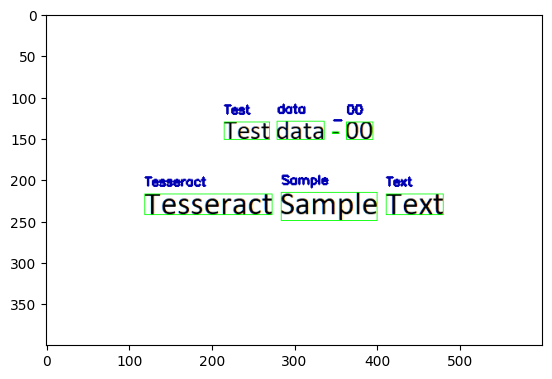

In [39]:
for i in range(len(test_res['text'])):
    x = test_res['left'][i]
    y = test_res['top'][i]
    w = test_res['width'][i]
    h = test_res['height'][i]
    text = test_res['text'][i]
    conf = int(test_res['conf'][i])
    if conf > 80:
        print(text, conf)
        cv2.rectangle(res_img, (x,y), (x+w,y+h), (0,255,0), 1)
        cv2.putText(res_img, text, (x,y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,180), 2)
    plt.imshow(res_img)

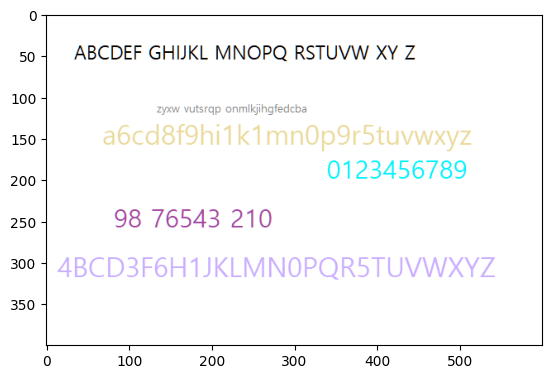

In [40]:
sample = cv2.imread(".\\testdata\\t1.png")
sample_res_img = sample.copy()
plt.imshow(sample)

In [41]:
sample_res = pytesseract.image_to_data(sample, output_type=pytesseract.Output.DICT)
for i in sample_res:
    print("%10s" % i, end='    ')
    print(sample_res[i])

     level    [1, 2, 3, 4, 5, 5, 5, 5, 5, 5, 2, 3, 4, 5, 5, 5, 2, 3, 4, 5, 4, 5, 2, 3, 4, 5, 5, 5]
  page_num    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
 block_num    [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4]
   par_num    [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1]
  line_num    [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 1, 1, 1]
  word_num    [0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 0, 0, 0, 1, 2, 3, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 2, 3]
      left    [0, 34, 34, 34, 34, 125, 206, 302, 399, 434, 134, 134, 134, 134, 167, 218, 70, 70, 70, 70, 341, 341, 84, 84, 84, 84, 129, 225]
       top    [0, 38, 38, 38, 38, 38, 38, 38, 38, 38, 109, 109, 109, 112, 110, 109, 133, 133, 133, 133, 177, 177, 236, 236, 236, 236, 236, 236]
     width    [600, 413, 413, 413, 82, 71, 86, 89, 27, 13, 181, 181, 181, 28, 45, 97, 445, 445, 445, 445, 167, 167, 189, 

ABCDEF 92
GHIJKL 78
MNOPQ 91
RSTUVW 91
XY 93
Z 92
vutsrqp 68
onmikjihgtedcba 38
a6cd8f9hi1k1mnO0p9r5tuvwxyz 40
0123456789 95
98 96
76543 95
210 95


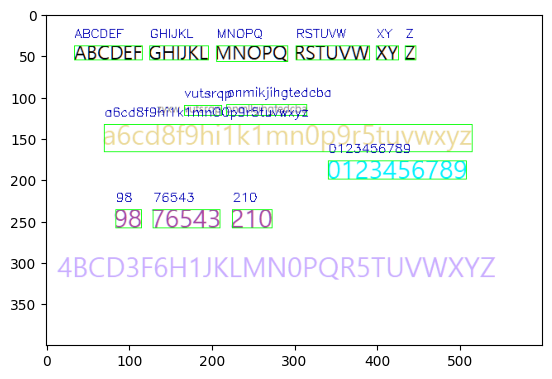

In [42]:
for i in range(len(sample_res['text'])):
    x = sample_res['left'][i]
    y = sample_res['top'][i]
    w = sample_res['width'][i]
    h = sample_res['height'][i]
    text = sample_res['text'][i]
    conf = int(sample_res['conf'][i])
    if conf > 30:
        print(text, conf)
        cv2.rectangle(sample_res_img, (x,y), (x+w,y+h), (0,255,0), 1)
        cv2.putText(sample_res_img, text, (x,y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,180), 1)
    plt.imshow(sample_res_img)

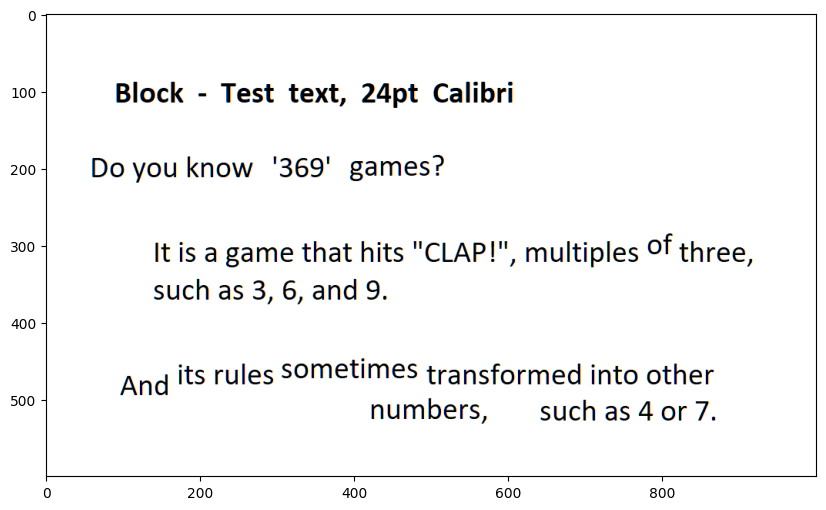

In [43]:
img = cv2.imread('.\\testdata\\testseq01.png')
res = img.copy()
plt.figure(figsize=(10,6))
plt.imshow(img)

In [44]:
tr_res = pytesseract.image_to_data(img, output_type=pytesseract.Output.DICT)
for i in tr_res:
    print("%10s" % i, end='    ')
    print(tr_res[i])

     level    [1, 2, 3, 4, 5, 5, 5, 5, 5, 5, 2, 3, 4, 5, 5, 5, 5, 5, 2, 3, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 2, 3, 4, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5]
  page_num    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
 block_num    [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
   par_num    [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
  line_num    [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2]
  word_num    [0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 0, 0, 0, 1, 2, 3, 4, 5, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 0, 1, 

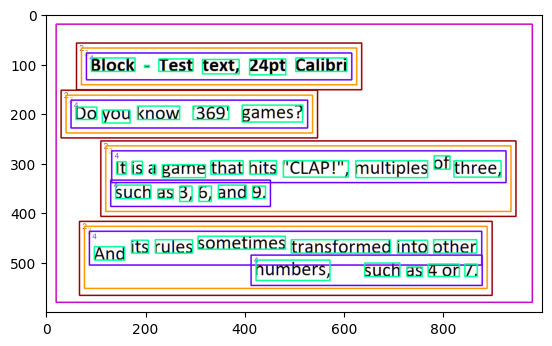

In [50]:
for i in range(len(tr_res['text'])):
    x = tr_res['left'][i]
    y = tr_res['top'][i]
    w = tr_res['width'][i]
    h = tr_res['height'][i]

    conf = int(tr_res['conf'][i])
    level = int(tr_res['level'][i])

    if conf==-1:
        if level==1:
            cv2.rectangle(res, (x+20,y+20), (x+w-20,y+h-20), (200,0,200), 2)
        if level==2:
            cv2.rectangle(res, (x-30,y-30), (x+w+30,y+h+30), (150,0,0), 2)
            cv2.putText(res, str(level), (x-25,y-15), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (150,0,0), 1)
        if level==3:
            cv2.rectangle(res, (x-20,y-20), (x+w+20,y+h+20), (255,150,0), 2)
            cv2.putText(res, str(level), (x-15,y-5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,150,0), 1)
        if level==4:
            cv2.rectangle(res, (x-10,y-10), (x+w+10,y+h+10), (100,0,255), 2)
            cv2.putText(res, str(level), (x-5,y+5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (100,0,255), 1)
        #cv2.putText(detail_img, str(test_res['block_num'][i]), (x,y-25), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (200,0,0), 1)
    else:
        cv2.rectangle(res, (x,y), (x+w,y+h), (0,255,0+int(tr_res['level'][i])*30), 2)
        #cv2.putText(detail_img, text, (x,y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,180), 1)
    
plt.imshow(res)

In [55]:
text_block = []
ptext = ''
for i in range(len(tr_res['text'])):
    level = int(tr_res['level'][i])
    if level==4:
        text_block.append(ptext.strip())
        ptext = ''
    elif level==5:
        ptext += tr_res['text'][i] + ' '
text_block.append(ptext.strip())
print(text_block)
for j in text_block[1:]:
    print(j)

['', 'Block - Test text, 24pt Calibri', "Do you know '369' games?", 'It is a game that hits "CLAP!", multiples of three,', 'such as 3, 6, and 9.', 'And its rules sometimes transformed into other', 'numbers, such as 4or 7.']
Block - Test text, 24pt Calibri
Do you know '369' games?
It is a game that hits "CLAP!", multiples of three,
such as 3, 6, and 9.
And its rules sometimes transformed into other
numbers, such as 4or 7.
